<h2> Napisy i wyrażenia regularne

In [1]:
seq = "ATATA"

In [2]:
seq.count("A")   

3

In [3]:
seq.count("ATA")

1

In [3]:
import re

len(re.findall('(?=ATA)', seq))

2

<h3> Biblioteka re

- [abc] <-- a lub b lub c
- [A-Z] <-- od A do Z
- [^X]  <-- wszystko z wyjątkiem X
- . <-- cokolwiek
- \d <-- dowolna cyfra od 0 do 9
- \D <-- wszystko z wyjątkiem cyfr [^d]
- \s <-- spacja
- \S <-- wszystko co nie jest spacją
- \w <-- a-z, A-Z, cyfry, podkreślenie _
- \* <-- żadne lub dowolnej długości powtórzenie, np ca*t znaczy ct, cat, caat, caaat...
- \+ <-- jedno lub więcej powtórzenie, np ca+t znaczy cat, caat, caaat...
- ? <-- żadne wystąpienie lub jedno wystąpienie, np pyt?hon znaczy pyhon lub python
- {n} <-- znaczy, że coś ma nastąpić n razy
- {n,m} <-- znaczy, że coś ma nastąpić między n a m razy np ab{1,3}c znaczy  abc, abbc, abbbc
- (X|Y) <-- X lub Y
- ^x <-- znaczy, że od x ma sie zacząć wyraz
- x$ <-- znaczy, że na x ma sie kończyc wyraz

In [5]:
text = "dog deg dag dug dag dag"

t = re.findall('d[oa]g', text)    
print(t)

['dog', 'dag', 'dag', 'dag']


In [6]:
seq = "ATGCGTTGCCTTAGCATCGCTTTGATCGGAGCCTAGGCG"

t2 = re.findall('CG?T{2}', seq)
print(t2)

['CGTT', 'CTT', 'CTT']


<h4> Zadanie1: Dla sekwencji $s$ zapisz do listy wszystkie podsekwencje postaci $GXXTA$, gdzie $X$ jest dowolnym nukleotydem z wyjątkiem adeniny.

In [7]:
s = "ATGCGCGCGGCGGATCGAATAGGCTAGCTAGGCTATATGCGCTATATGCGCCGTATAGGAGTCTAGCGTATATGCGATTCGATTCGTATAGCGTAGCTCTGAGACTCTGAGAGC"

<h2> Matplotlib

In [4]:
import matplotlib.pyplot as plt  #pakiet do rysowania wykresow

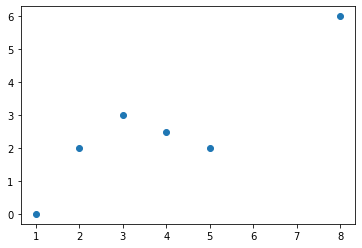

In [9]:
x = [1,2,3,4,5,8]
y = [0,2,3,2.5,2,6]

plt.scatter(x,y)
plt.show()

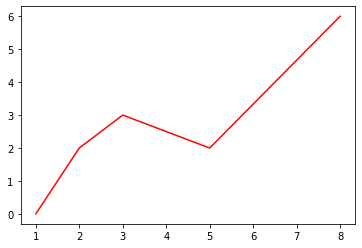

In [10]:
plt.plot(x,y, c = "red")
plt.show()

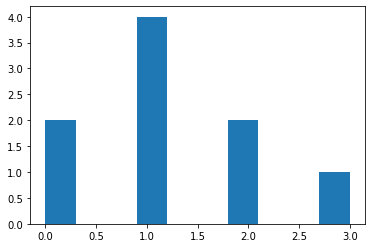

In [11]:
t = [0,0,1,1,1,1,2,2,3]

plt.hist(t) #rysowanie histogramu
plt.show()

<h2> 1. Drugie prawo Chargaffa

Okazuje się, że dla organizmów posiadających jako materiał genetyczny dwuniciowy DNA spełnione jest następujące prawo, dla każdej z nici: częstość występowania danej sekwencji i odwrotnie do niej komplementarnej jest w przybliżeniu takie samo. W szczególnym przypadku $A \% \approx T \%$ oraz $C \% \approx G\%$. Okazuje sie, że przyczyna tego prawa może mieć naturę termodynamiczną (DNA sequence symmetries from randomness: the origin of the Chargaff’s second parity rule, Briefings in Bioinformatics, 2020).

In [11]:
f = open("ec.fasta", "r")  #pobieram genom E.coli #HG738867.1
g = f.read()
f.close()

In [6]:
g[:500]

'AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATAGCAGC\nTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTTTATTGACTTAGGTCACTAAATACTTTAACCAA\nTATAGGCATAGCGCACAGACAGATAAAAATTACAGAGTACACAACATCCATGAAACGCATTAGCACCACC\nATTACCACCACCATCACCATTACCACAGGTAACGGTGCGGGCTGACGCGTACAGGAAACACAGAAAAAAG\nCCCGCACCTGACAGTGCGGGCTTTTTTTTTCGACCAAAGGTAACGAGGTAACAACCATGCGAGTGTTGAA\nGTTCGGCGGTACATCAGTGGCAAATGCAGAACGTTTTCTGCGTGTTGCCGATATTCTGGAAAGCAATGCC\nAGGCAGGGGCAGGTGGCCACCGTCCTCTCTGCCCCCGCCAAAATCACCAACCACCTGGTGGCGATGATTG\nAAA'

In [12]:
g = g.replace('\n', '') #kasuje \n (znaki końca linii)

In [13]:
N = len(g)
print(N)

4527247


In [14]:
#Stosunki A/T i G/C

g.count("A")/g.count("T"), g.count("G")/g.count("C")

(0.9967237559950964, 1.023655446429986)

In [91]:
#tworzę liste dinukleotydow

nukleotydy = ["A","T","G","C"]
din =[]

for n in nukleotydy:
    for m in nukleotydy:
        din.append(n+m)

print(din)

['AA', 'AT', 'AG', 'AC', 'TA', 'TT', 'TG', 'TC', 'GA', 'GT', 'GG', 'GC', 'CA', 'CT', 'CG', 'CC']


In [92]:
Z = [len(re.findall('(?='+x+')', g))/(N-1) for x in din] #częstosci występowania dinukleotydow

print(Z)

[0.07295362346115056, 0.06672224129194658, 0.05160399942923358, 0.054400622365119986, 0.045640108799035885, 0.07314225911293533, 0.07087531801894574, 0.05683035558483016, 0.05838140891835787, 0.05607117439608981, 0.05969456928119214, 0.08273683382789448, 0.06870512448406824, 0.050552366714775386, 0.07471009969416285, 0.056979894620261415]


In [93]:
sum(Z)

1.0

In [94]:
czestosci = dict(zip(din,[round(x,6) for x in Z]))

print(czestosci)

{'AA': 0.072954, 'AT': 0.066722, 'AG': 0.051604, 'AC': 0.054401, 'TA': 0.04564, 'TT': 0.073142, 'TG': 0.070875, 'TC': 0.05683, 'GA': 0.058381, 'GT': 0.056071, 'GG': 0.059695, 'GC': 0.082737, 'CA': 0.068705, 'CT': 0.050552, 'CG': 0.07471, 'CC': 0.05698}


In [98]:
#definuje funkcje, ktora dla zadanej sekwencji zwraca sekwencje do niej odwrotnie komplementarną

def REV_COM_DNA(seq):
    complementary_code = {"A":"T", "T":"A", "G":"C", "C":"G"}
    rev_com_seq = ''
    for elem in seq:
        rev_com_seq =  complementary_code[elem]+rev_com_seq
    return rev_com_seq

In [99]:
N_SK = [x for x in din if x != REV_COM_DNA(x)]  #wybieram tylko te dinukleotydy ktore nie są rownoczesnie odwrotną komplementarną (jak np AT)
print(N_SK)

['AA', 'AG', 'AC', 'TT', 'TG', 'TC', 'GA', 'GT', 'GG', 'CA', 'CT', 'CC']


In [100]:
unikatowe = set() 
ile = []
for x in N_SK:
    for y in N_SK:
        if x == REV_COM_DNA(y) and x not in unikatowe and y not in unikatowe:
            ile.append(czestosci[x]/czestosci[y])
            unikatowe.add(x)
            unikatowe.add(y)

In [101]:
print(unikatowe)

{'AA', 'TG', 'CC', 'CT', 'TT', 'GA', 'AG', 'CA', 'TC', 'GT', 'AC', 'GG'}


In [102]:
print(ile) #stosunki częstosci dinukleotydow i odwrotnie do nich komplementarnych

[0.9974296573787975, 1.0208102547871498, 0.9702163328636906, 1.031584309730005, 0.9734331374933625, 1.0476482976482975]


In [103]:
import numpy as np

print(np.mean(ile))
print()
print(np.std(ile))

1.0068536649835507

0.02892124629832622


<h4> Zadanie2: Wykonaj analogiczne obliczenia dla trójek i czwórek nukleotydów. Narysuj histogramy stosunków częstości dla obu przypadków.